In [98]:
import matplotlib.pyplot as plt
import numpy as np
import csv

In [ ]:
filename = 'C:\\Users\\Sahaj Bindal\\OneDrive\\Desktop\\EEA GNN\\housing_prices - housing_prices.csv'
X_list = []
y_list = []

with open(filename, 'r') as file:
    reader = csv.reader(file)
    header = next(reader) 
    
    for row in reader:
        X_list.append(float(row[0])) # Square Footage
        y_list.append(float(row[1])) # Price

X = np.array(X_list)
y = np.array(y_list)

In [100]:
X=(X - np.mean(X)) / np.std(X)
y=(y - np.mean(y)) / np.std(y)

In [101]:
class gdalgo:
    def __init__(self,X,y,alpha):
        self.X = X
        self.y = y
        self.m= 0
        self.c= 0
        self.lr = alpha
    
    def cost(self):
        n = len(self.X)
        y_pred = self.m * self.X + self.c
        return (1/(2*n)) * np.sum((self.y - y_pred) ** 2)
    
    def grad(self):
        n = len(self.X)
        y_pred = self.m * self.X + self.c
        dm = (-1/n) * np.sum(self.X * (self.y - y_pred))
        dc = (-1/n) * np.sum(self.y - y_pred)
        return dm, dc
    
    def update_params(self,n):
        for i in range(n):
            self.m= self.m - self.lr * self.grad()[0]
            self.c= self.c - self.lr * self.grad()[1]
        return self.m, self.c

In [102]:
def gdalgo_main(X, y, alpha, iterations):
    gda = gdalgo(X, y, alpha)
    m, c = gda.update_params(iterations)
    print(f"Optimized Slope: {m}, Optimized Intercept: {c}")
    
    y_pred = m * X + c
    plt.scatter(X, y)
    plt.plot(X, y_pred, color='red')
    plt.show()

    return m, c

Optimized Slope: 0.9871910498229095, Optimized Intercept: -1.9428902930940235e-16


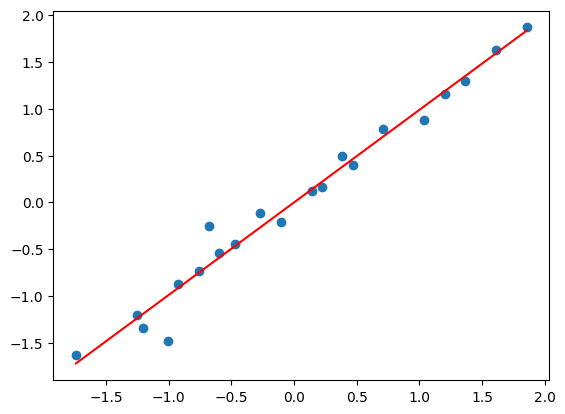

In [ ]:
m, c = gdalgo_main(X, y,0.1, 1000)

In [104]:
X = np.array(X_list)
y = np.array(y_list)

X_std=np.std(X)
y_std=np.std(y)
X_mean=np.mean(X)
y_mean=np.mean(y)

m = m * (y_std / X_std)
c = y_mean - (m * X_mean)

print(f"Final Slope: {m}, Final Intercept: {c}")

Final Slope: 171.1732732937617, Final Intercept: 1627.3680380252772


In [105]:
def price(sqft,m,c):
    return f"{(m*sqft + c):.2f}"

In [106]:
price_estimate = price(2500,m,c)
print(f"Estimated price for 2500 sqft: ${price_estimate}")

Estimated price for 2500 sqft: $429560.55
